## 4. Explain the differences between a box filter, a Gaussian filter, and a Bilateral filter.

Box filter： Sum the pixel values within each box quickly，the drawback is that it does not support multi-scale.

Gaussian filter：Gaussian is a low-pass filter, it removes high-frequency components from the image. Appropriate for additive, zero-mean noise. Separability. Gaussian filtering can cause loss of image details and reduce image sharpness.


Bilateral filter: Bilateral filter effectively removes noise while preserving image edge details by simultaneously considering the spatial distance between pixels and color similarity.


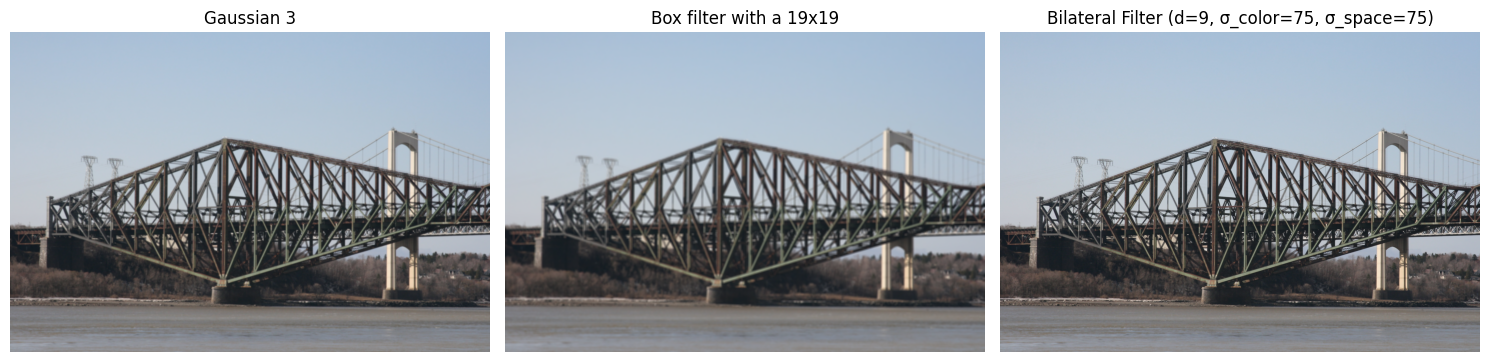

In [3]:
#4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'source/QuebecBridge_EleView.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format for visualization

# Crop the image
bbox = [152.51, 7.51, 142.98, 135.98]
patch = img[int(bbox[1]):int(bbox[1]+bbox[3]), int(bbox[0]):int(bbox[0]+bbox[2])]


# Define Gaussian filter using OpenCV's getGaussianKernel function
f1_gaussian = cv2.getGaussianKernel(19, 3) * cv2.getGaussianKernel(19, 3).T

# Define average filter
f2_average = np.ones((19, 19), dtype=np.float32) / 361  # 19*19 = 361

# Define bilateral filter
bilateral_result = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Plot the images with the new filters applied
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(cv2.filter2D(img, -1, f1_gaussian)), plt.title('Gaussian 3'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.filter2D(img, -1, f2_average)), plt.title('Box filter with a 19x19'), plt.axis('off')
plt.subplot(133), plt.imshow(bilateral_result), plt.title('Bilateral Filter (d=9, σ_color=75, σ_space=75)'), plt.axis('off')

plt.tight_layout()
plt.show()


## 5. Apply the filters to the image and discuss the results and effects of the filter parameters. 

Box filter: The larger the kernel size, the stronger the smoothing effect, but the more obvious the edge blurring.

Gaussian filter: The σ value controls the weight distribution; a larger σ produces a smoother result. As the σ value gets bigger, the edges start to blur.

Bilateral filter: Control color similarity to influence edge preservation capability


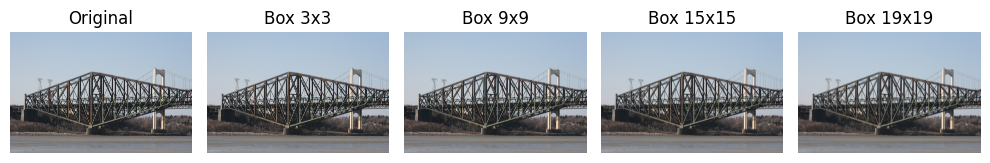

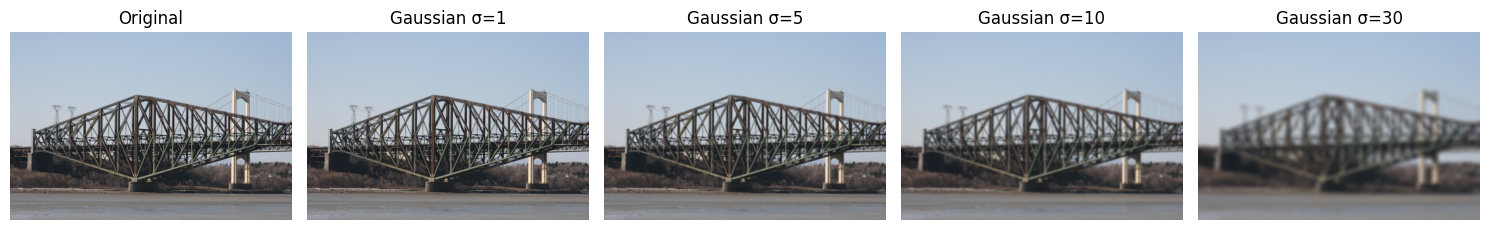

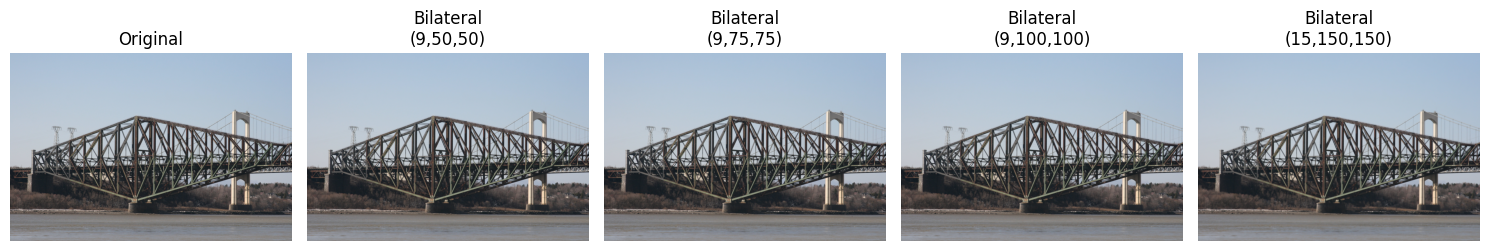

In [4]:
#5
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r'source/QuebecBridge_EleView.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format for visualization

# Crop the image
bbox = [152.51, 7.51, 142.98, 135.98]
patch = img[int(bbox[1]):int(bbox[1]+bbox[3]), int(bbox[0]):int(bbox[0]+bbox[2])]

# 1. Box Filter  with different kernel sizes
box_3 = np.ones((3, 3), np.float32) / 9
box_9 = np.ones((9, 9), np.float32) / 81
box_15 = np.ones((15, 15), np.float32) / 225
box_19 = np.ones((19,19),np.float32) / 361

# Define Gaussian filters using OpenCV's getGaussianKernel function
f1 = cv2.getGaussianKernel(101, 1) * cv2.getGaussianKernel(101, 1).T
f2 = cv2.getGaussianKernel(101, 5) * cv2.getGaussianKernel(101, 5).T
f3 = cv2.getGaussianKernel(101, 10) * cv2.getGaussianKernel(101, 10).T
f4 = cv2.getGaussianKernel(101, 30) * cv2.getGaussianKernel(101, 30).T

# Apply bilateral filters
bilateral_1 = cv2.bilateralFilter(img, 9, 50, 50)
bilateral_2 = cv2.bilateralFilter(img, 9, 75, 75)
bilateral_3 = cv2.bilateralFilter(img, 9, 100, 100)
bilateral_4 = cv2.bilateralFilter(img, 15, 150, 150)
# Plot the images
plt.figure(figsize=(10, 4))
plt.subplot(151), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(152), plt.imshow(cv2.filter2D(img, -1, box_3)), plt.title('Box 3x3'), plt.axis('off')
plt.subplot(153), plt.imshow(cv2.filter2D(img, -1, box_9)), plt.title('Box 9x9'), plt.axis('off')
plt.subplot(154), plt.imshow(cv2.filter2D(img, -1, box_15)), plt.title('Box 15x15'), plt.axis('off')
plt.subplot(155), plt.imshow(cv2.filter2D(img, -1, box_19)), plt.title('Box 19x19'), plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 4))
plt.subplot(151), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(152), plt.imshow(cv2.filter2D(img, -1, f1)), plt.title('Gaussian σ=1'), plt.axis('off')
plt.subplot(153), plt.imshow(cv2.filter2D(img, -1, f2)), plt.title('Gaussian σ=5'), plt.axis('off')
plt.subplot(154), plt.imshow(cv2.filter2D(img, -1, f3)), plt.title('Gaussian σ=10'), plt.axis('off')
plt.subplot(155), plt.imshow(cv2.filter2D(img, -1, f4)), plt.title('Gaussian σ=30'), plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 4))
plt.subplot(151), plt.imshow(img), plt.title('Original'), plt.axis('off')
plt.subplot(152), plt.imshow(bilateral_1), plt.title('Bilateral\n(9,50,50)'), plt.axis('off')
plt.subplot(153), plt.imshow(bilateral_2), plt.title('Bilateral\n(9,75,75)'), plt.axis('off')
plt.subplot(154), plt.imshow(bilateral_3), plt.title('Bilateral\n(9,100,100)'), plt.axis('off')
plt.subplot(155), plt.imshow(bilateral_4), plt.title('Bilateral\n(15,150,150)'), plt.axis('off')
plt.tight_layout()
plt.show()

## 6. Apply high-pass and low-pass filters in the frequency domain and show the results. How does the filter threshold influence your results?

Low-pass filter: A lower cutoff frequency preserves more low-frequency information (smooth areas), while a higher cutoff frequency retains more detail

High pass filter: a smaller cut-off frequency extracts more edge details, while a larger cut-off frequency may introduce noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.112330118879973].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.112330118879973].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.511848443752772e-17..1.0000000000000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.067445841893033].


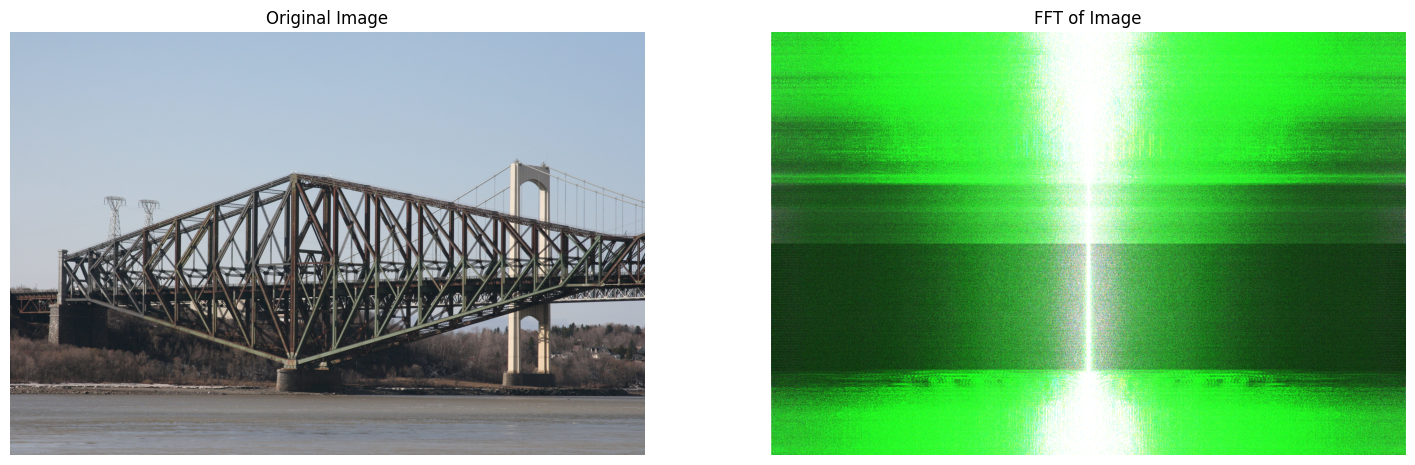

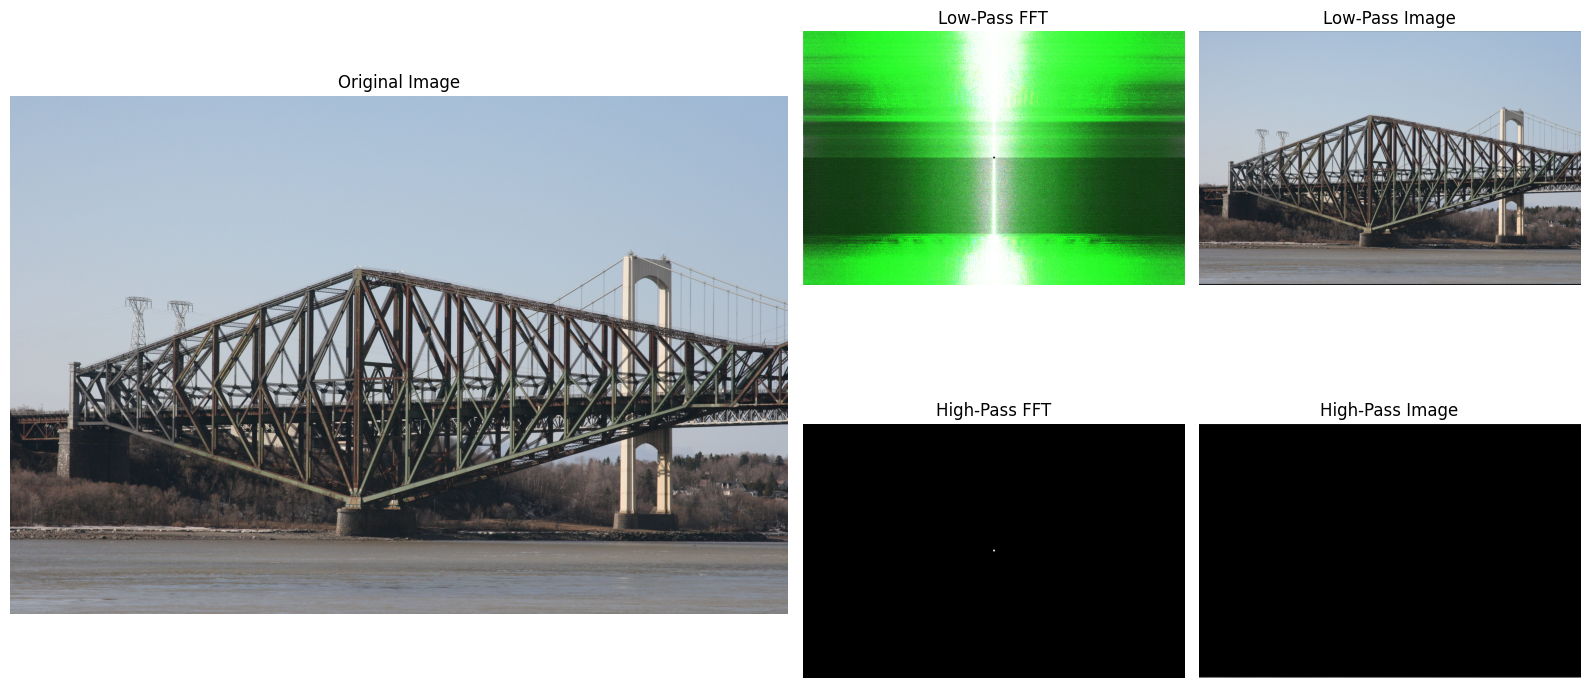

In [5]:
#6
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, img_as_float

# Load the image
img = io.imread(r'source/QuebecBridge_EleView.jpg')
img = img_as_float(img)

# Compute 2D Fourier transform and shift zero frequency component to center
imgf = fftshift(fft2(img))
imgf_display = np.log(np.abs(imgf) + 1)

# Create a figure and set its size
fig1 = plt.figure(figsize=(18,8))
plt.subplot(121)
plt.imshow(img, cmap='gray'); plt.axis('off')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(imgf_display, cmap='gray'); plt.axis('off')
plt.title('FFT of Image')

# Create a binary mask for frequency filtering
mask = np.ones(img.shape)
Y, X = np.ogrid[:img.shape[0], :img.shape[1]]
center = np.array(img.shape) // 2
c_sz = 10
mask = ((X - center[1]) ** 2 + (Y - center[0]) ** 2) < c_sz ** 2

# Low-pass filter: Zero out frequencies inside the circle
imgf_low = imgf.copy()
imgf_low[mask] = 0
img_low = ifft2(ifftshift(imgf_low))

# High-pass filter: Zero out frequencies outside the circle
imgf_high = imgf.copy()
imgf_high[~mask] = 0
img_high = ifft2(ifftshift(imgf_high))

# Create another figure for displaying results of frequency filtering
fig2 = plt.figure(figsize=(16,8))
plt.subplot(2, 4, (1, 6))
plt.imshow(img, cmap='gray')
plt.title('Original Image'); plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(np.log(np.abs(imgf_low) + 1), cmap='gray')
plt.title('Low-Pass FFT'); plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(np.abs(img_low), cmap='gray')
plt.title('Low-Pass Image'); plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(np.log(np.abs(imgf_high) + 1), cmap='gray')
plt.title('High-Pass FFT'); plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(np.abs(img_high), cmap='gray')
plt.title('High-Pass Image'); plt.axis('off')

plt.tight_layout()
plt.show()

## 7. What are the benefits of processing images in the frequency domain?  

Processing images in the frequency domain is suitable for processing large-sized images and complex filters. It is easy to implement adaptive filtering and frequency domain operations. It can be applicated to remove periodic patterns and better to create hybrid image.